In [1]:
from __future__ import division

import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta, date, time

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [2]:
training_path = 'dataSets/training/'
test_path1 = 'dataSets/testing_phase1/'

In [3]:
training_traj = pd.read_csv(training_path+'trajectories(table 5)_training.csv')
test_traj1 = pd.read_csv(test_path1+'trajectories(table 5)_test1.csv')

In [4]:
training_vol = pd.read_csv(training_path+'volume(table 6)_training.csv')
test_vol1 = pd.read_csv(test_path1+'volume(table 6)_test1.csv')

In [5]:
def time_to_window(x):
    dt = datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
    dtmin = int(dt.minute / 20) * 20
    dtwindow = datetime(dt.year, dt.month, dt.day, dt.hour, dtmin, 0)
    return dtwindow


In [6]:
def format_window(wd):
    return '[{},{})'.format(str(wd), str(wd+timedelta(minutes=20)))

In [7]:
#training_traj['starting_datetime'] = pd.to_datetime(training_path['starting_time'])
training_traj['window'] = training_traj['starting_time'].apply(time_to_window)

training_traj_group_mean = \
training_traj.groupby(['intersection_id','tollgate_id','window']).mean()['travel_time']

training_traj_group_count = \
training_traj.groupby(['intersection_id','tollgate_id','window']).count()['travel_time']

In [8]:
training_vol['window'] = training_vol['time'].apply(time_to_window)

training_vol_group_count = \
training_vol.groupby(['tollgate_id','direction','window']).count()['time']



In [9]:
test_vol1['window'] = test_vol1['time'].apply(time_to_window)

test_vol_group_count = \
test_vol1.groupby(['tollgate_id','direction','window']).count()['time']

In [10]:
sample = pd.read_csv('/Users/yutao/Documents/Contest/tianchi/KDD_CUP2017/submission/submission_sample_volume.csv')

In [11]:
date_list = []

d1 = date(2016, 9, 19)  # start date
d2 = date(2016, 10, 17)  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    date_list.append(d1 + timedelta(days=i))

give_time_list1 = [time(6,0), time(6,20), time(6,40), 
                   time(7,0), time(7,20), time(7,40)]
pred_time_list1 = [time(8,0), time(8,20), time(8,40), 
                   time(9,0), time(9,20), time(9,40)]

give_time_list2 = [time(15,0), time(15,20), time(15,40), 
                   time(16,0), time(16,20), time(16,40)]
pred_time_list2 = [time(17,0), time(17,20), time(17,40), 
                   time(18,0), time(18,20), time(18,40)]

In [12]:
date_list2 = []

d1 = date(2016, 10, 11)  # start date
d2 = date(2016, 10, 17)  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    date_list2.append(d1 + timedelta(days=i))




In [13]:
def interpolate_missing_window(x):
    ss = [(i-datetime(1970,1,1)).total_seconds() for i in x.index]
    tt = x.values
    ssall = np.linspace(ss[0], ss[-1], (ss[-1]-ss[0])/1200+1)
    #print(len(ss), len(tt), len(ssall))
    ttall = np.interp(ssall, ss, tt)
    ssall = [int(i) for i in ssall]
    ssall = [datetime(1970,1,1)+timedelta(seconds=i) for i in ssall]
    return pd.Series(index=ssall, data=ttall)

In [14]:
first6 = np.array([])
next6 = np.array([])
for ti, d in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    mtmp = training_vol_group_count.loc[ti, d]
    #mtmp = interpolate_missing_window(mtmp)
    test6 = []
    for i in date_list:
        tmp = []
        for j in give_time_list1:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    first6 = np.append(first6, result6)
    
    test6 = []
    for i in date_list:
        tmp = []
        for j in pred_time_list1:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    next6 = np.append(next6, result6)

morning_volume66 = np.append(first6.reshape(-1,6), next6.reshape(-1,6), axis=1)

In [15]:
tiid = ['10']*29 + ['11']*29 + ['20']*29 + ['30']*29 + ['31']*29
dlid = date_list*5

In [16]:
first6 = np.array([])
next6 = np.array([])
for ti, d in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    mtmp = training_vol_group_count.loc[ti, d]
    #mtmp = interpolate_missing_window(mtmp)
    test6 = []
    for i in date_list:
        tmp = []
        for j in give_time_list2:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    first6 = np.append(first6, result6)
    
    test6 = []
    for i in date_list:
        tmp = []
        for j in pred_time_list2:
            try:
                tmp.append(mtmp[datetime.combine(i, j)])
            except:
                tmp.append(0)
        test6.append(tmp)
    result6 = test6
    next6 = np.append(next6, result6)

night_volume66 = np.append(first6.reshape(-1,6), next6.reshape(-1,6), axis=1)

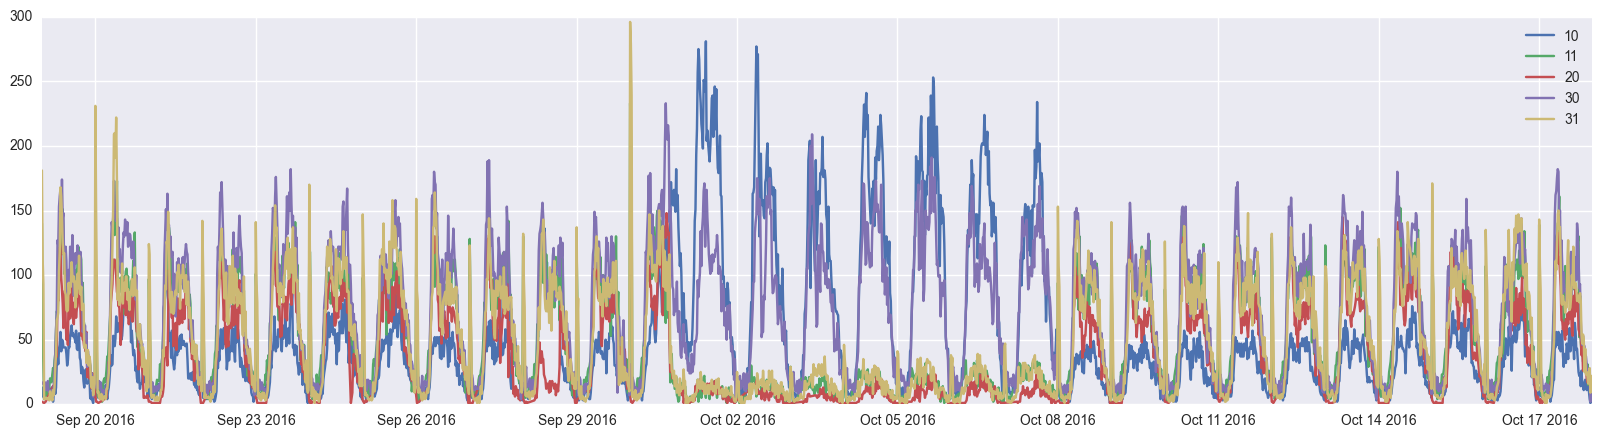

In [17]:
ttt10 = training_vol_group_count.loc[1, 0]
ttt11 = training_vol_group_count.loc[1, 1]
ttt20 = training_vol_group_count.loc[2, 0]
ttt30 = training_vol_group_count.loc[3, 0]
ttt31 = training_vol_group_count.loc[3, 1]

plt.figure(figsize=(20,5))
plt.plot(ttt10.index, ttt10)
plt.plot(ttt11.index, ttt11)
plt.plot(ttt20.index, ttt20)
plt.plot(ttt30.index, ttt30)
plt.plot(ttt31.index, ttt31)

plt.legend([10,11,20,30,31])

In [18]:
df_morning = pd.DataFrame(morning_volume66)

df_night = pd.DataFrame(night_volume66)

In [19]:
df_morning['ti'] = tiid
df_morning['dl'] = dlid
df_night['ti'] = tiid
df_night['dl'] = dlid

In [20]:
holiday_list = []

d1 = date(2016, 10, 1)  # start date
d2 = date(2016, 10, 7)  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    holiday_list.append(d1 + timedelta(days=i))

In [21]:
df_morning2 = df_morning[~df_morning['dl'].isin(holiday_list)]
df_night2 = df_night[~df_night['dl'].isin(holiday_list)]

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
def pred_loss(x_pred, x_true):
    x_pred = np.array(x_pred).reshape(1,-1)
    x_true = np.array(x_true).reshape(1,-1)
    #print(x_true)

    return (abs(x_pred-x_true)/x_true).mean()

In [31]:
df_morning2['wkwn'] = ([1,1,1,1,1,0,0,1,1,1,1,1,1,1,1]+[1,1,1,1,0,0,1])*5
df_morning2['wkwn'] *= 30

/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [32]:
date_train = df_morning2['dl'].unique()[:-7]
df_morning2_train = df_morning2[df_morning2['dl'].isin(date_train)]
df_morning2_valid = df_morning2[~df_morning2['dl'].isin(date_train)]

In [33]:
X = df_morning2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values
y = df_morning2_train.iloc[:,6:12]#.values


neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X, y)
for _ in range(3):
    y = 0.1*y + 0.9*neigh.predict(X)
    neigh.fit(X, y)
    

In [34]:
pred_loss(np.vectorize(round)(neigh.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-1]])*0.97), 
          df_morning2_valid.iloc[:,6:12])

0.12872285649227572

In [35]:
npred = neigh.predict(df_morning2_valid.iloc[:,[0,1,2,3,4,5,-1]])
ntrue = df_morning2_valid.iloc[:,6:12].values


(array([  3.,  12.,  25.,  52.,  55.,  34.,  15.,   4.,   0.,   1.,   2.,
          1.,   1.,   0.,   1.,   2.,   1.,   1.]),
 array([-0.40139533, -0.30743887, -0.21348242, -0.11952596, -0.0255695 ,
         0.06838695,  0.16234341,  0.25629987,  0.35025632,  0.44421278,
         0.53816924,  0.63212569,  0.72608215,  0.8200386 ,  0.91399506,
         1.00795152,  1.10190797,  1.19586443,  1.28982089]),
 <a list of 18 Patch objects>)

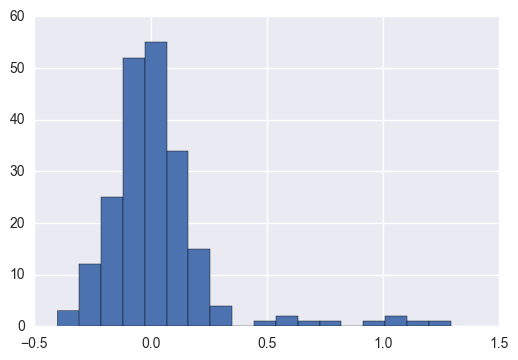

In [36]:
loss_ratio = ((ntrue-npred)/npred).flatten()
plt.hist(loss_ratio, bins=18)

In [37]:
from scipy.stats import norm

In [39]:
norm.fit(loss_ratio, floc=0)

(0, 0.23843384929949318)

In [40]:
df_night2['wkwn'] = ([1,1,1,1,1,0,0,1,1,1,1,1,1,1,1]+[1,1,1,1,0,0,1])*5
df_night2['wkwn'] *= 30

/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [41]:
date_train = df_night2['dl'].unique()[:-7]
df_night2_train = df_night2[df_night2['dl'].isin(date_train)]
df_night2_valid = df_night2[~df_night2['dl'].isin(date_train)]

In [42]:
X = df_night2_train.iloc[:,[0,1,2,3,4,5,-1]]#.values
y = df_night2_train.iloc[:,6:12]#.values

neigh = KNeighborsRegressor(n_neighbors=12, weights='distance')
neigh.fit(X, y) 
pred_loss(np.vectorize(round)(neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]])*0.97), 
          df_night2_valid.iloc[:,6:12])



0.15697161102173404

In [43]:
npred = neigh.predict(df_night2_valid.iloc[:,[0,1,2,3,4,5,-1]])
ntrue = df_night2_valid.iloc[:,6:12].values

(array([  2.,   4.,  10.,   5.,  11.,  31.,  20.,  28.,  25.,  25.,  16.,
         23.,   5.,   3.,   1.,   0.,   0.,   1.]),
 array([-0.46982681, -0.4073253 , -0.34482379, -0.28232228, -0.21982077,
        -0.15731926, -0.09481775, -0.03231624,  0.03018528,  0.09268679,
         0.1551883 ,  0.21768981,  0.28019132,  0.34269283,  0.40519434,
         0.46769585,  0.53019736,  0.59269887,  0.65520038]),
 <a list of 18 Patch objects>)

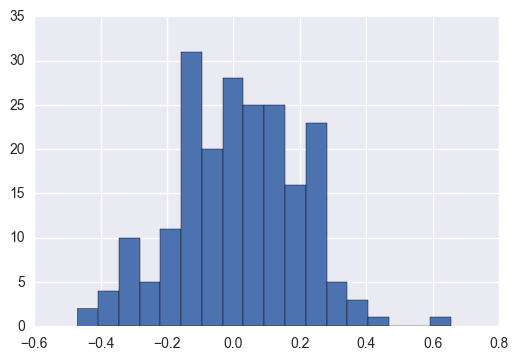

In [44]:
loss_ratio = ((ntrue-npred)/npred).flatten()
plt.hist(loss_ratio, bins=18)

In [45]:
norm.fit(loss_ratio, floc=0)

(0, 0.18580772790872649)

In [46]:
op = []

for i, j in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    tvm = test_vol_group_count.loc[i].loc[j].reshape(-1,6)[::2]
    tvm = np.concatenate([tvm, [[1],[1],[1],[1],[0],[0],[1]]], axis=1)
    op += list(0.97*neigh_morning.predict(tvm).T.reshape(1,-1)[0])

for i, j in [(1,0), (1,1), (2,0), (3,0), (3,1)]:
    tvm = test_vol_group_count.loc[i].loc[j].reshape(-1,6)[1::2]
    tvm = np.concatenate([tvm, [[1],[1],[1],[1],[0],[0],[1]]], axis=1)
    op += list(0.97*neigh_night.predict(tvm).T.reshape(1,-1)[0])

NameError: name 'neigh_morning' is not defined

In [ ]:
sample['volume'] = op

sample.to_csv('submission/submission_0502v.csv', index=False)